## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.ensemble import IsolationForest

import eda_helper_functions

## 2. Read the Training Data

In [2]:
file_path = r"D:\Coding\AWS Flight Fare Prediction\Data\train.csv"

train = pd.read_csv(file_path)

train

,date_of_journey,airlines,airlines_code,class,departure,total_stops,arrival,duration_in_minutes,source,destination,price_fare
0,2024-08-27,Vistara,UK-959,Business,12:07:00,1.0,21:52:00,735.0,Delhi,Cochin,37193
1,2024-05-10,Air India,AI-805,Economy,09:22:00,1.0,23:39:00,130.2,Delhi,Cochin,7320
2,2024-07-30,Spicejet,SG-8169,Economy,16:51:00,0.0,04:30:00,124.8,Banglore,Delhi,5021
3,2024-11-18,Air India,AI-481,Business,08:20:00,2.0,04:43:00,814.8,Kolkata,Banglore,31462
4,2024-10-12,Vistara,UK-817,Economy,06:53:00,0.0,17:29:00,435.0,Banglore,New Delhi,10208
...,...,...,...,...,...,...,...,...,...,...,...
6831,2024-09-16,Indigo,6E-2016,Economy,14:32:00,1.0,16:01:00,135.0,Kolkata,Banglore,7319
6832,2024-11-26,Vistara,UK-813,Economy,22:07:00,2.0,19:41:00,349.8,Delhi,Cochin,9961
6833,2024-05-27,Air India,AI-453,Economy,06:32:00,2.0,23:56:00,775.2,Delhi,Cochin,17675
6834,2024-07-07,Vistara,UK-879,Business,00:49:00,1.0,02:45:00,880.2,Kolkata,Banglore,41281


### 2.1 Fixing Data Types

In [3]:
train.dtypes

date_of_journey         object
airlines                object
airlines_code           object
class                   object
departure               object
total_stops            float64
arrival                 object
duration_in_minutes    float64
source                  object
destination             object
price_fare               int64
dtype: object

In [4]:
train=train.assign(**{
    col: pd.to_datetime(train.loc[:,col],format="mixed")
    for col in ["date_of_journey","arrival","departure"]
})
train

,date_of_journey,airlines,airlines_code,class,departure,total_stops,arrival,duration_in_minutes,source,destination,price_fare
0,2024-08-27,Vistara,UK-959,Business,2024-05-24 12:07:00,1.0,2024-05-24 21:52:00,735.0,Delhi,Cochin,37193
1,2024-05-10,Air India,AI-805,Economy,2024-05-24 09:22:00,1.0,2024-05-24 23:39:00,130.2,Delhi,Cochin,7320
2,2024-07-30,Spicejet,SG-8169,Economy,2024-05-24 16:51:00,0.0,2024-05-24 04:30:00,124.8,Banglore,Delhi,5021
3,2024-11-18,Air India,AI-481,Business,2024-05-24 08:20:00,2.0,2024-05-24 04:43:00,814.8,Kolkata,Banglore,31462
4,2024-10-12,Vistara,UK-817,Economy,2024-05-24 06:53:00,0.0,2024-05-24 17:29:00,435.0,Banglore,New Delhi,10208
...,...,...,...,...,...,...,...,...,...,...,...
6831,2024-09-16,Indigo,6E-2016,Economy,2024-05-24 14:32:00,1.0,2024-05-24 16:01:00,135.0,Kolkata,Banglore,7319
6832,2024-11-26,Vistara,UK-813,Economy,2024-05-24 22:07:00,2.0,2024-05-24 19:41:00,349.8,Delhi,Cochin,9961
6833,2024-05-27,Air India,AI-453,Economy,2024-05-24 06:32:00,2.0,2024-05-24 23:56:00,775.2,Delhi,Cochin,17675
6834,2024-07-07,Vistara,UK-879,Business,2024-05-24 00:49:00,1.0,2024-05-24 02:45:00,880.2,Kolkata,Banglore,41281


In [5]:
train.dtypes

date_of_journey        datetime64[ns]
airlines                       object
airlines_code                  object
class                          object
departure              datetime64[ns]
total_stops                   float64
arrival                datetime64[ns]
duration_in_minutes           float64
source                         object
destination                    object
price_fare                      int64
dtype: object

## 3. High Level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6836 entries, 0 to 6835
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_journey      6836 non-null   datetime64[ns]
 1   airlines             6836 non-null   object        
 2   airlines_code        6836 non-null   object        
 3   class                6836 non-null   object        
 4   departure            6836 non-null   datetime64[ns]
 5   total_stops          6836 non-null   float64       
 6   arrival              6836 non-null   datetime64[ns]
 7   duration_in_minutes  6836 non-null   float64       
 8   source               6836 non-null   object        
 9   destination          6836 non-null   object        
 10  price_fare           6836 non-null   int64         
dtypes: datetime64[ns](3), float64(2), int64(1), object(5)
memory usage: 587.6+ KB


In [7]:
train.describe(include="number")

,total_stops,duration_in_minutes,price_fare
count,6836.000000,6836.000000,6836.000000
mean,0.818754,606.759655,20785.735664
std,0.672202,415.794726,18502.799074
min,0.000000,115.200000,4093.000000
25%,0.000000,289.800000,7677.000000
50%,1.000000,505.200000,12254.500000
75%,1.000000,865.200000,29805.000000
max,3.000000,1714.800000,110441.000000


In [8]:
train.describe(include="O")

,airlines,airlines_code,class,source,destination
count,6836,6836,6836,6836,6836
unique,7,198,4,5,6
top,Vistara,UK-819,Economy,Delhi,Cochin
freq,3157,145,3705,2891,2891


In [9]:
# Changing total_stops to object data type 
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include="O")
)

,airlines,airlines_code,class,total_stops,source,destination
count,6836,6836,6836,6836.0,6836,6836
unique,7,198,4,4.0,5,6
top,Vistara,UK-819,Economy,1.0,Delhi,Cochin
freq,3157,145,3705,3604.0,2891,2891


In [10]:
train['class'].unique()

array(['Business', 'Economy', 'Premium Economy', 'First'], dtype=object)

### 3.1 Observation

- We have learned from the above describe function that in airlines column vistara occurs most frequent times that is 3157
- airlines_code UK-819 occurs 145 times and Economy class occurs 3705 times
- In source Delhi occurs 2891 times and in Destination column Cochin occurs same as that of Delhi.

## 4. High Level Analysis of Outliers

In [11]:
forest = IsolationForest(n_estimators=10,random_state=41)

In [12]:
(
    train
    .assign(outliers=forest.fit_predict(
        train
        .drop(columns="price_fare")
        .select_dtypes(include="number"))
    )
    .query("outliers == -1")
)

,date_of_journey,airlines,airlines_code,class,departure,total_stops,arrival,duration_in_minutes,source,destination,price_fare,outliers
2,2024-07-30,Spicejet,SG-8169,Economy,2024-05-24 16:51:00,0.0,2024-05-24 04:30:00,124.8,Banglore,Delhi,5021,-1
3,2024-11-18,Air India,AI-481,Business,2024-05-24 08:20:00,2.0,2024-05-24 04:43:00,814.8,Kolkata,Banglore,31462,-1
4,2024-10-12,Vistara,UK-817,Economy,2024-05-24 06:53:00,0.0,2024-05-24 17:29:00,435.0,Banglore,New Delhi,10208,-1
5,2024-07-24,Air Asia,I5-1228,Economy,2024-05-24 14:58:00,0.0,2024-05-24 20:24:00,690.0,Mumbai,Hyderabad,4827,-1
6,2024-08-12,Vistara,UK-927,Economy,2024-05-24 17:44:00,0.0,2024-05-24 22:38:00,124.8,Mumbai,Hyderabad,5955,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
6826,2024-02-02,Air India,AI-465,Business,2024-05-24 15:39:00,0.0,2024-05-24 15:48:00,1050.0,Banglore,Delhi,50109,-1
6827,2024-07-26,Vistara,UK-811,Economy,2024-05-24 01:25:00,1.0,2024-05-24 05:39:00,1605.0,Kolkata,Banglore,8018,-1
6829,2024-06-05,Vistara,UK-635,Premium Economy,2024-05-24 12:22:00,0.0,2024-05-24 14:43:00,289.8,Mumbai,Hyderabad,19878,-1
6830,2024-08-15,Air Asia,I5-741,Economy,2024-05-24 10:17:00,1.0,2024-05-24 07:34:00,280.2,Delhi,Cochin,7319,-1


## 5. Pair PLots

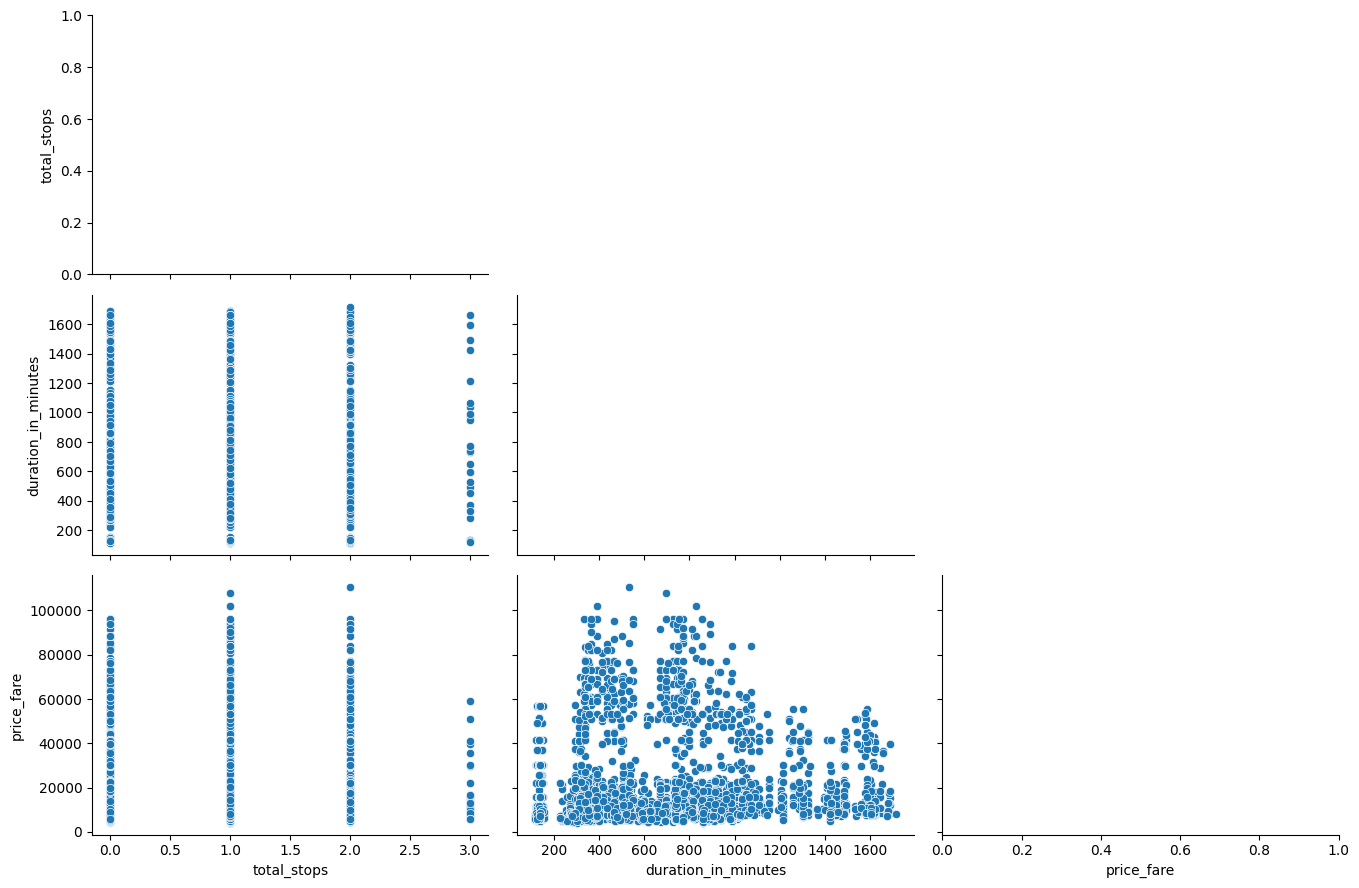

In [13]:
eda_helper_functions.pair_plots(train)

### 5.1 Observation

- As total_stops increases price_fare gradually increases from the graph
- As duration_in_minutes price_fare linearly increases from the graph

## 6. Correlation Analysis

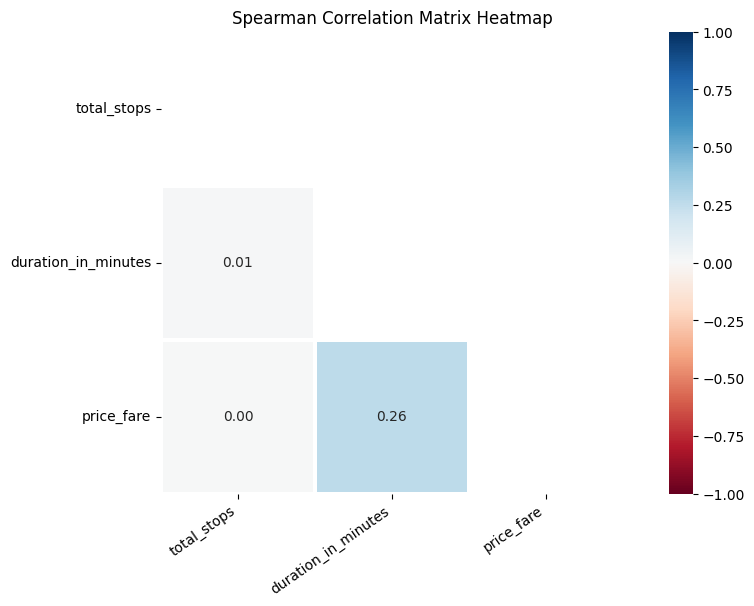

In [14]:
eda_helper_functions.correlation_heatmap(train)

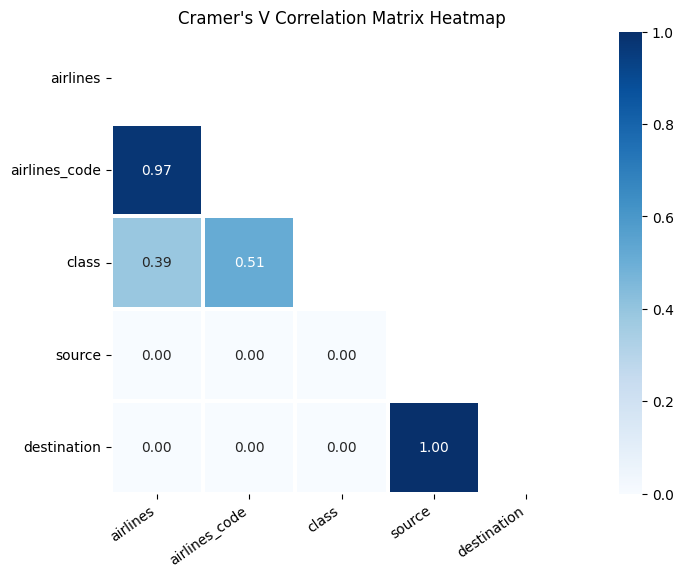

In [15]:
eda_helper_functions.cramersV_heatmap(train)

## 7. Detailed Analysis

In [16]:
train.columns

Index(['date_of_journey', 'airlines', 'airlines_code', 'class', 'departure',
       'total_stops', 'arrival', 'duration_in_minutes', 'source',
       'destination', 'price_fare'],
      dtype='object')

### 7.1 Airlines

In [17]:
train.airlines

0         Vistara
1       Air India
2        Spicejet
3       Air India
4         Vistara
          ...    
6831       Indigo
6832      Vistara
6833    Air India
6834      Vistara
6835       Indigo
Name: airlines, Length: 6836, dtype: object

In [18]:
eda_helper_functions.cat_summary(train,"airlines")

0         Vistara
1       Air India
2        Spicejet
3       Air India
4         Vistara
          ...    
6831       Indigo
6832      Vistara
6833    Air India
6834      Vistara
6835       Indigo
Name: airlines, Length: 6836, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,
count,6836
unique,7
top,Vistara
freq,3157


,count,percentage
category,,
Vistara,3157,0.461820
Air India,1922,0.281159
Indigo,816,0.119368
Go First,511,0.074751
Air Asia,331,0.048420
Spicejet,81,0.011849
Akasa Air,18,0.002633


### Explanation
- We can get the count and percentage through the function named value_counts and if we do normalize=true in value _counts then we will get percentage

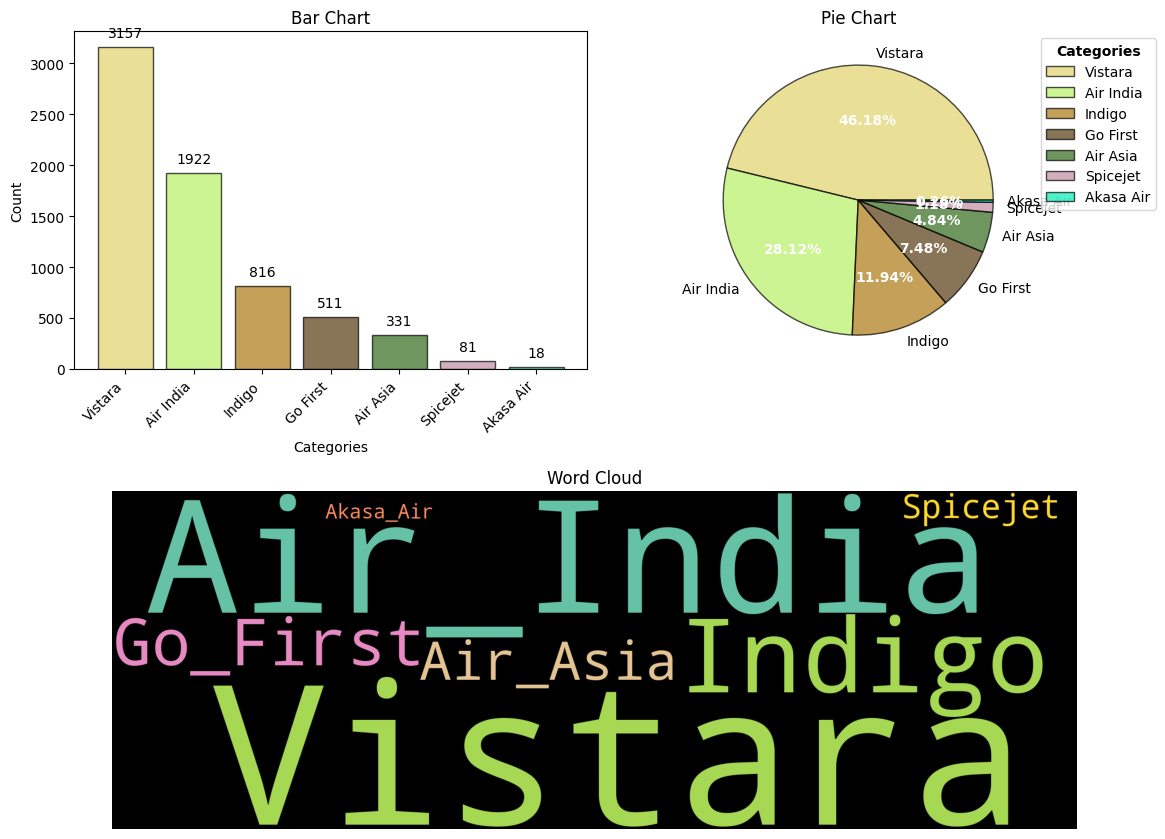

In [19]:
eda_helper_functions.cat_univar_plots(train,"airlines")

### Explanation of Word cloud
- It is the nice way to show the cardinality that is if it occurs maximum times then the word is bigger and if it occurs less then the word is smaller.
- So, here Vistara and Air India occurs most frequent times so the word is bigger 

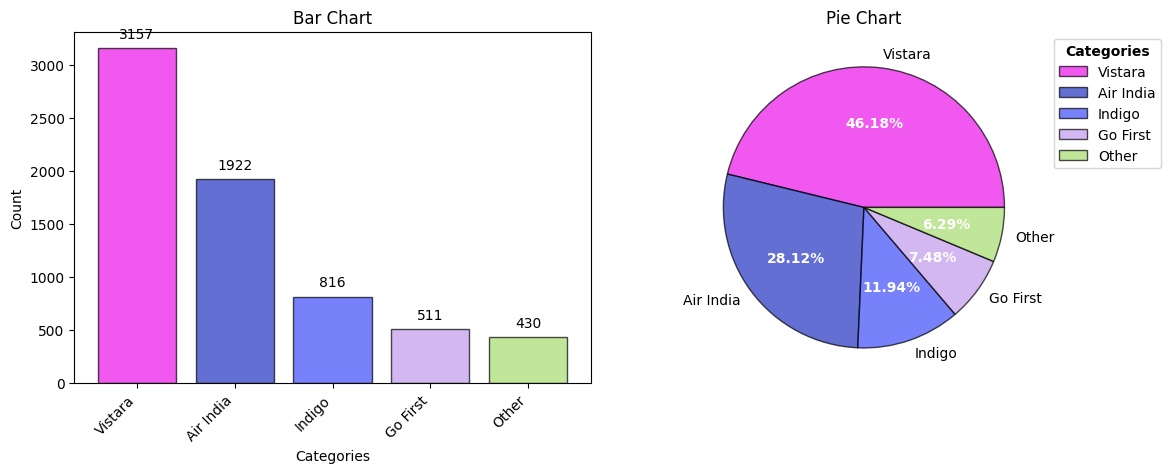

In [20]:
eda_helper_functions.cat_univar_plots(train,"airlines",show_wordcloud=False,k=4)

### Explanation 
- Here, K=4 means it will select top 4 categories that are occuring maximum times and rest 3 categories will put in the other as we can see in bar graph.

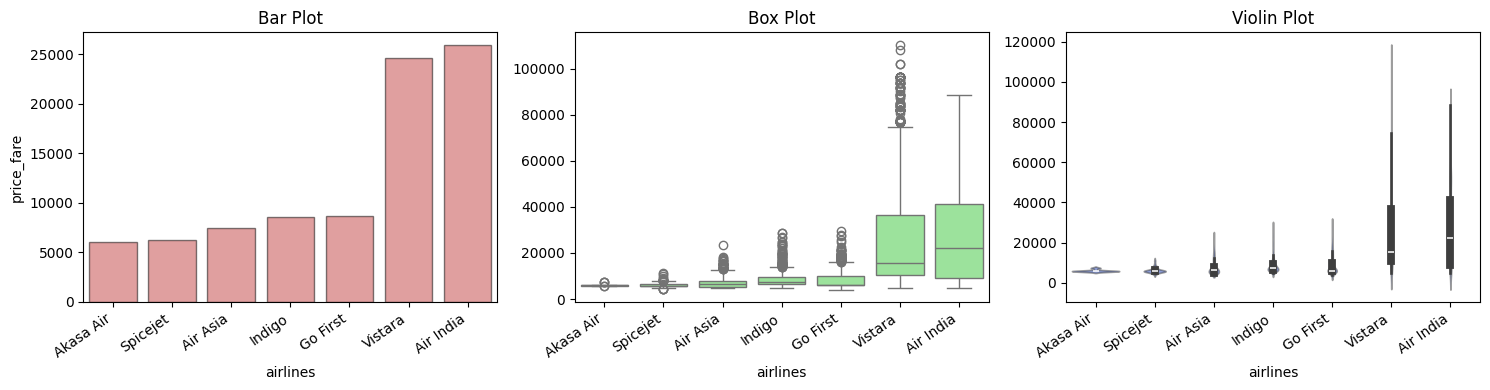

In [21]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price_fare",
	cat_var="airlines"
)

### Explanation
- From the above graph we can make a judgement that price fare depends on the airlines we choose.

In [22]:
eda_helper_functions.num_cat_hyp_testing(train, "price_fare", "airlines")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 216.31361921277923
- p-value              : 1.4159198043749984e-253
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_fare and airlines are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2097.5555493382726
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_fare and airlines are associated to each other


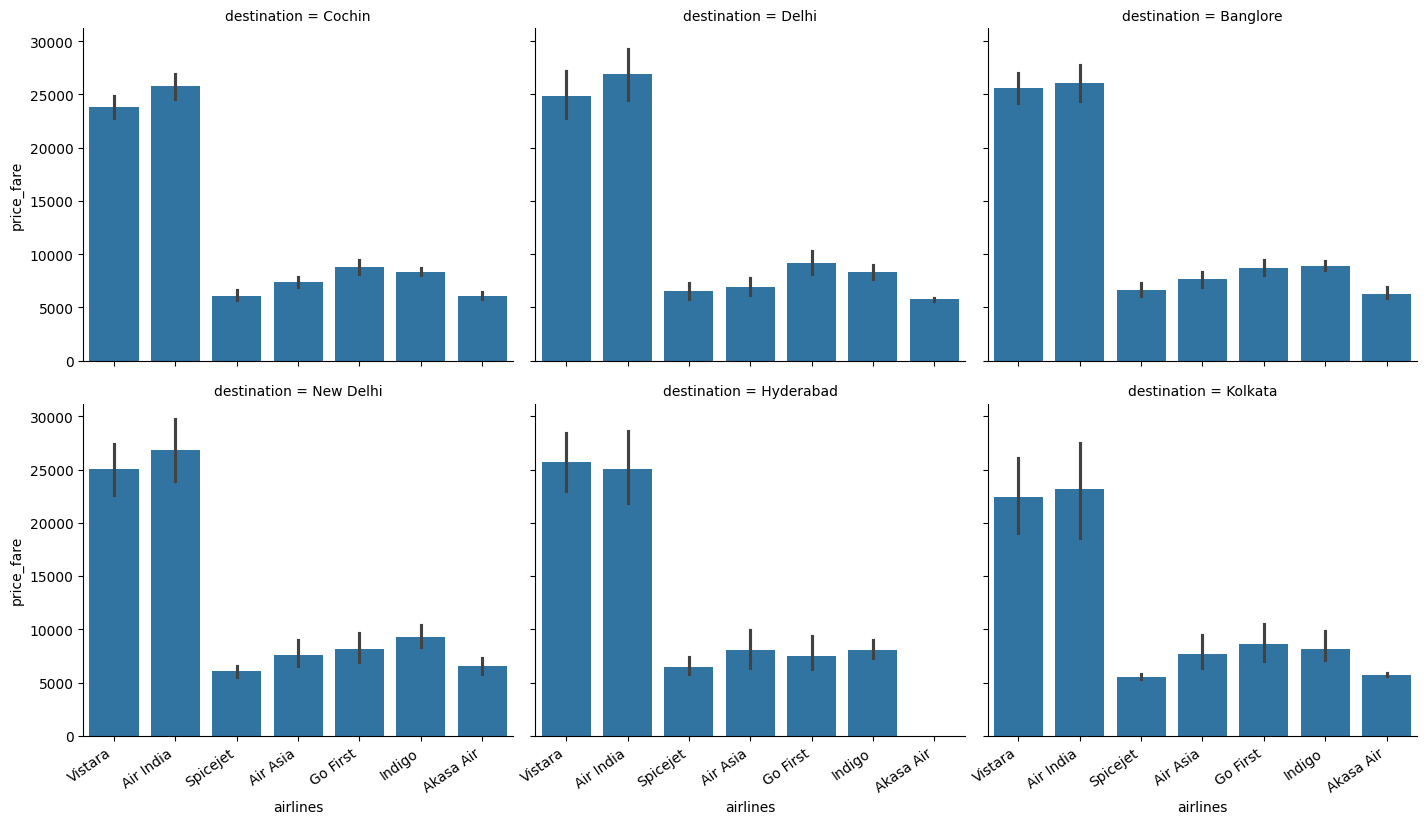

In [23]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airlines", "price_fare", order=train.airlines.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 Date of Journey

In [24]:
train.date_of_journey

0      2024-08-27
1      2024-05-10
2      2024-07-30
3      2024-11-18
4      2024-10-12
          ...    
6831   2024-09-16
6832   2024-11-26
6833   2024-05-27
6834   2024-07-07
6835   2024-11-23
Name: date_of_journey, Length: 6836, dtype: datetime64[ns]

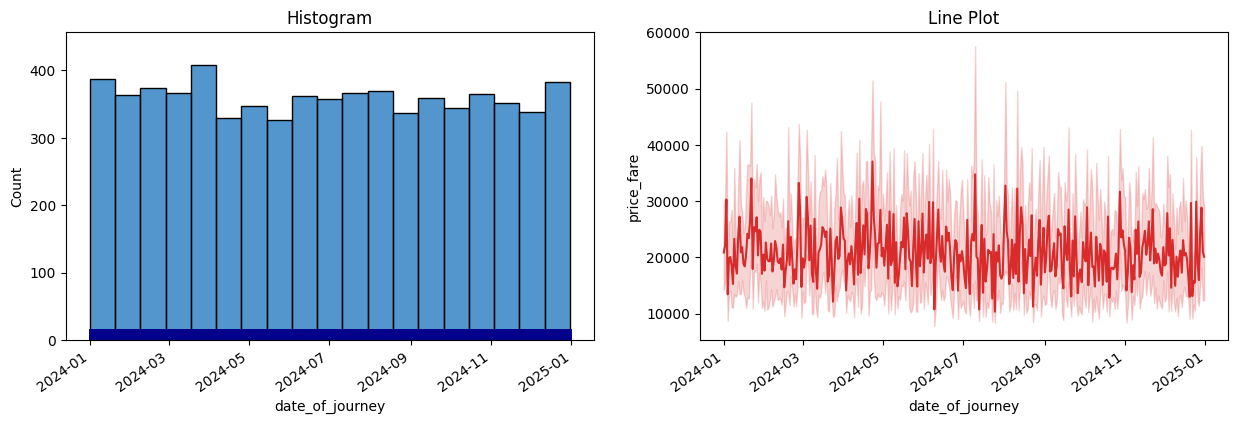

In [25]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price_fare"
)

### Explanation
- From the above graph from the date of journey we can see the number of flights from the time period mentioned and from line plot we can see the price fare from the date of journey

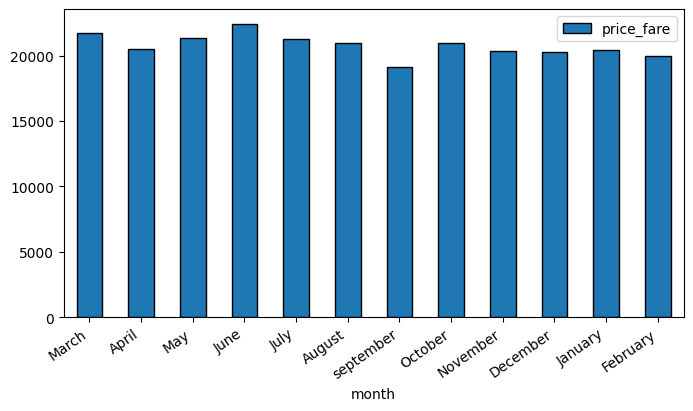

In [26]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price_fare.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June","July","August","september","October","November","December","January","February"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

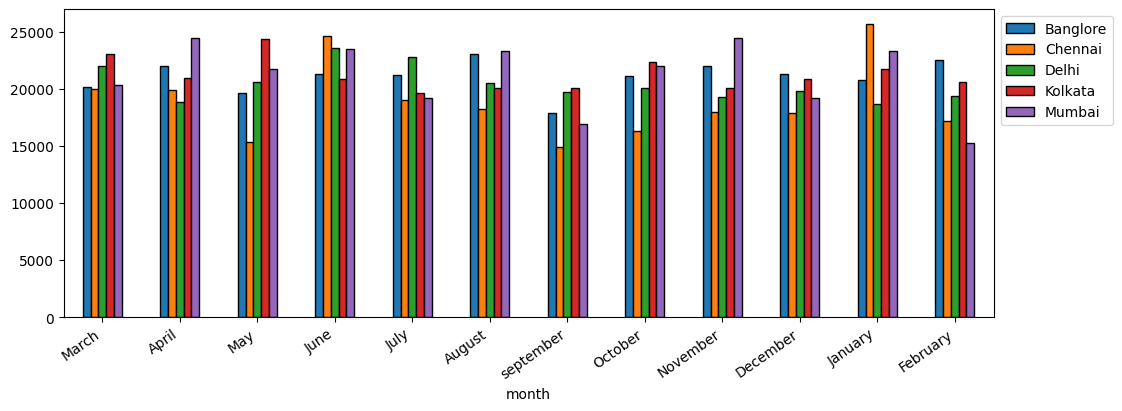

In [27]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price_fare.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June","July","August","september","October","November","December","January","February"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 Departure Time

In [28]:
train.departure

0      2024-05-24 12:07:00
1      2024-05-24 09:22:00
2      2024-05-24 16:51:00
3      2024-05-24 08:20:00
4      2024-05-24 06:53:00
               ...        
6831   2024-05-24 14:32:00
6832   2024-05-24 22:07:00
6833   2024-05-24 06:32:00
6834   2024-05-24 00:49:00
6835   2024-05-24 05:59:00
Name: departure, Length: 6836, dtype: datetime64[ns]

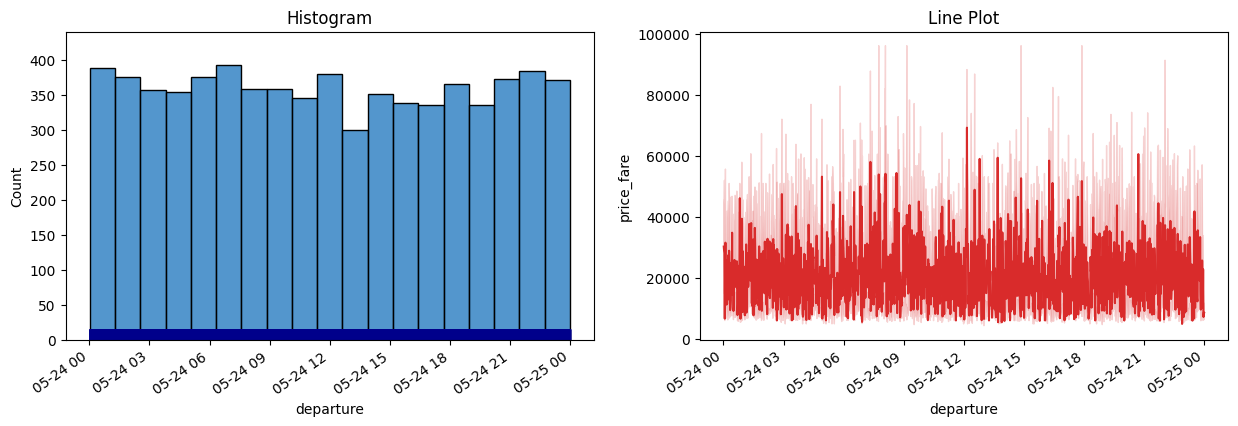

In [29]:
eda_helper_functions.dt_univar_plots(train, "departure", "price_fare")

In [30]:
'''(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.departure.dt.hour.between(4, 12, inclusive="left"),
				   df_.departure.dt.hour.between(12, 16, inclusive="left"),
				   df_.departure.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price_fare", "departure")
)'''

'(\n\ttrain\n\t.assign(dep_time=lambda df_: (\n\t\tnp.select([df_.departure.dt.hour.between(4, 12, inclusive="left"),\n\t\t\t\t   df_.departure.dt.hour.between(12, 16, inclusive="left"),\n\t\t\t\t   df_.departure.dt.hour.between(16, 20, inclusive="left")],\n\t\t\t\t  ["morning", "afternoon", "evening"],\n\t\t\t\t  default="night")\n\t))\n\t.pipe(eda_helper_functions.num_cat_bivar_plots, "price_fare", "departure")\n)'

### 8.4 Duration

In [31]:
train.duration_in_minutes

0       735.0
1       130.2
2       124.8
3       814.8
4       435.0
        ...  
6831    135.0
6832    349.8
6833    775.2
6834    880.2
6835    520.2
Name: duration_in_minutes, Length: 6836, dtype: float64

In [32]:
eda_helper_functions.num_summary(train, "duration_in_minutes")

0       735.0
1       130.2
2       124.8
3       814.8
4       435.0
        ...  
6831    135.0
6832    349.8
6833    775.2
6834    880.2
6835    520.2
Name: duration_in_minutes, Length: 6836, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,value
percentile,
0,115.2
5,130.2
10,135.0
25,289.8
50,505.2
75,865.2
90,1215.0
95,1485.0
99,1624.8


,value
mean,606.759655
trimmed mean (5%),579.066591
trimmed mean (10%),557.522523
median,505.200000


,value
var,172885.254477
std,415.794726
IQR,575.400000
mad,345.000000
coef_variance,0.685271


,value
skewness,0.742402
kurtosis,-0.236014


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.640997373230209e-52
Test Statistic       : 0.9139363336949627
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 152.8554699275128
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [33]:
train.duration_in_minutes.quantile([0.25, 0.5, 0.75])

0.25    289.8
0.50    505.2
0.75    865.2
Name: duration_in_minutes, dtype: float64

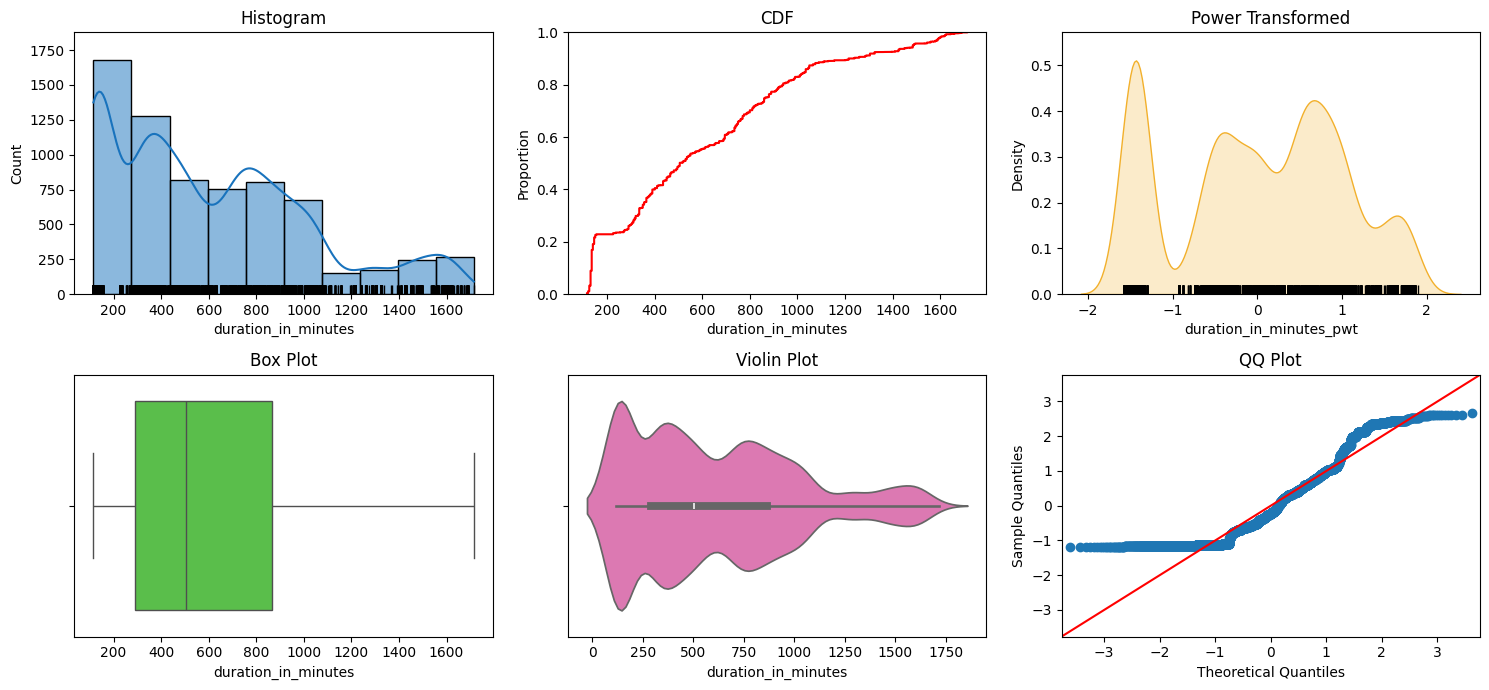

In [34]:
eda_helper_functions.num_univar_plots(train, "duration_in_minutes")

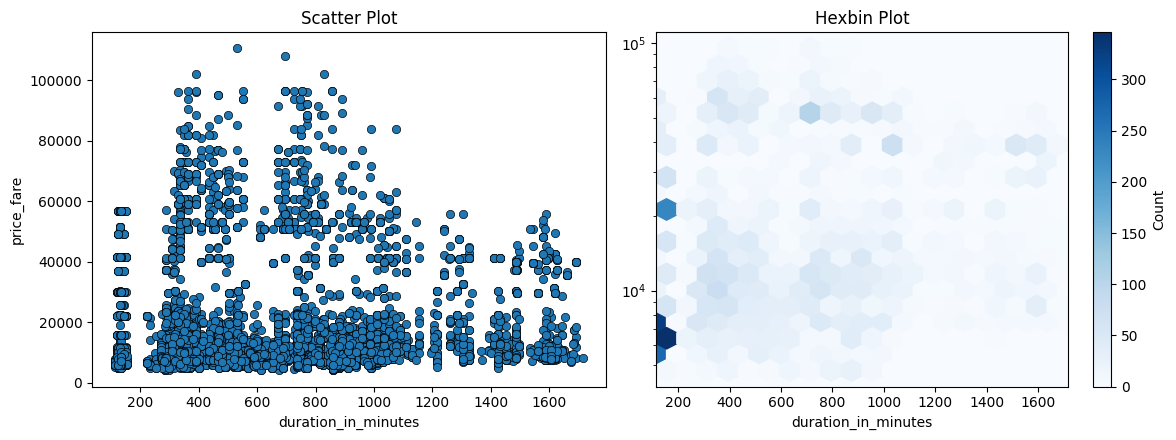

In [35]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration_in_minutes",
	"price_fare",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [36]:
eda_helper_functions.num_num_hyp_testing(train, "price_fare", "duration_in_minutes")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.13680862423920312
- p-value              : 6.40984197276447e-30
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_fare and duration_in_minutes are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.2632948793575719
- p-value              : 8.861584305989603e-109
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_fare and duration_in_minutes are correlated


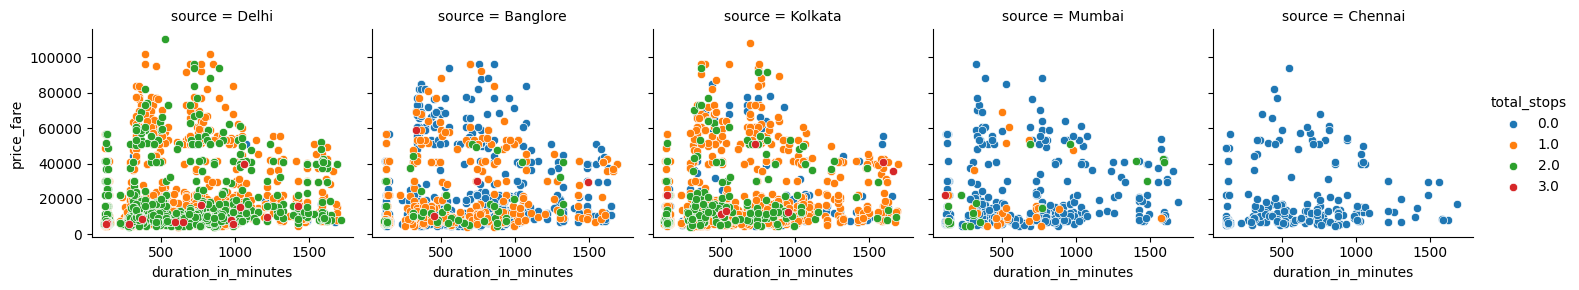

In [37]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration_in_minutes", "price_fare")

duration_grid.add_legend()

In [38]:
eda_helper_functions.get_iqr_outliers(train, "duration_in_minutes")

Lower Limit : -573.3000000000002
Upper Limit : 1728.3000000000002


,date_of_journey,airlines,airlines_code,class,departure,total_stops,arrival,duration_in_minutes,source,destination,price_fare


### 9. Automated EDA

In [40]:
from ydata_profiling import ProfileReport

In [42]:
report = ProfileReport(train)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]